# PCA

In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine = pd.read_csv("wine.csv")
wine.describe()
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# Converting into numpy array
Wine = wine.values
Wine

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
# Normalizing the numerical data 
wine_normal = scale(Wine)

In [16]:
wine_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [19]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [20]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_normal)

In [21]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

In [22]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42])

In [23]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

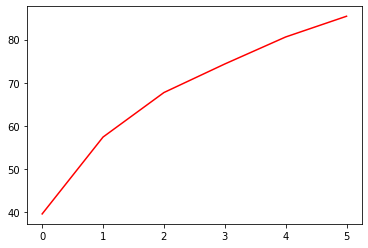

In [24]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [25]:
pca_values[:,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

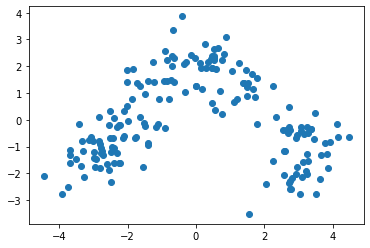

In [26]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [27]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

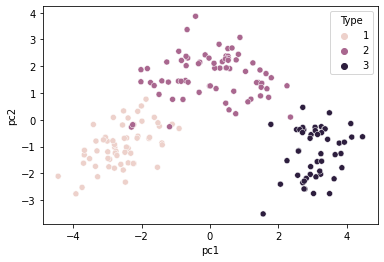

In [28]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

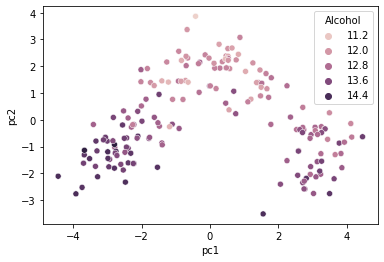

In [29]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Alcohol']]], axis = 1)
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Alcohol')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

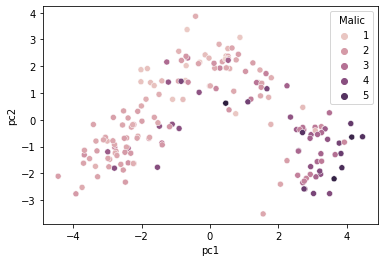

In [30]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Malic']]], axis = 1)
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Malic')

# Hierarchical clustring

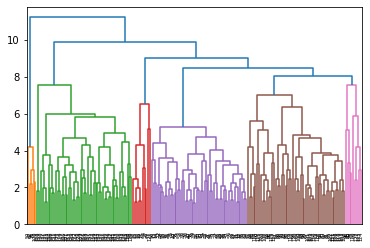

In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sn
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(wine_normal, method='complete'))

In [36]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [37]:
# save clusters for chart
y_hc = hc.fit_predict(wine_normal)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [38]:
wine['h_hc'] = Clusters

In [39]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_hc
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


# K Means Clusternig

In [40]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

C:\Users\Shambhuraje\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


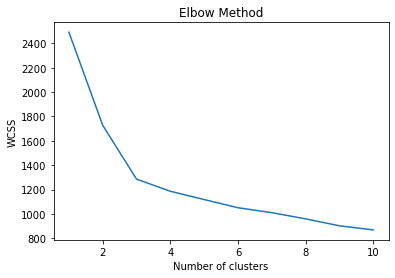

In [41]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#Selecting 5 clusters from the above pot which is the optimum number of custers
model=KMeans(n_clusters=4)
model.fit(wine_normal)

model.labels_ #getting the labels of clusters assigned to each row

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 2, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
md=pd.Series(model.labels_)#converting numpy array ntopandas series object
wine1=wine.copy()
wine1['clust']=md #creating a new column and assigning it to new column
wine1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_hc,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,2


In [44]:
#Assign clusters to the data set
wine1['clusterid_new'] = model.labels_

In [45]:
wine1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_hc,clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.288462,2.197308,2.338077,20.461538,103.269231,2.708846,2.622692,0.281923,2.133077,3.322308,1.033846,3.032692,559.846154,0.076923,0
1,1,1.000000,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.135593,1
2,2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,2.000000,2
3,3,2.000000,12.255455,1.732500,2.187955,20.054545,89.613636,2.006818,1.771818,0.406364,1.333409,2.908409,1.074455,2.656818,495.772727,0.431818,3


In [46]:
wine1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_hc,clust,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,2,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,2,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,2,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,2,2


In [47]:
wine1.iloc[:,1:17].groupby(wine1.clusterid_new).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_hc,clust,clusterid_new
clusterid_new,,,,,,,,,,,,,,,,
0,12.288462,2.197308,2.338077,20.461538,103.269231,2.708846,2.622692,0.281923,2.133077,3.322308,1.033846,3.032692,559.846154,0.076923,0,0
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.135593,1,1
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,2.000000,2,2
3,12.255455,1.732500,2.187955,20.054545,89.613636,2.006818,1.771818,0.406364,1.333409,2.908409,1.074455,2.656818,495.772727,0.431818,3,3
